
# Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report


import warnings
warnings.filterwarnings("ignore")

In [33]:
df=pd.read_csv("Desktop/loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
#Finding the shape of data
df.shape

(614, 13)

In [35]:
#Finding the null values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
df=df.dropna()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [37]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [200]:
#Checking duplicate values

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


No Duplicate values are present

In [38]:
#Finding the shape after removal of dataset

df.shape

(480, 13)

In [39]:
#Finding information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [40]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


# EDA

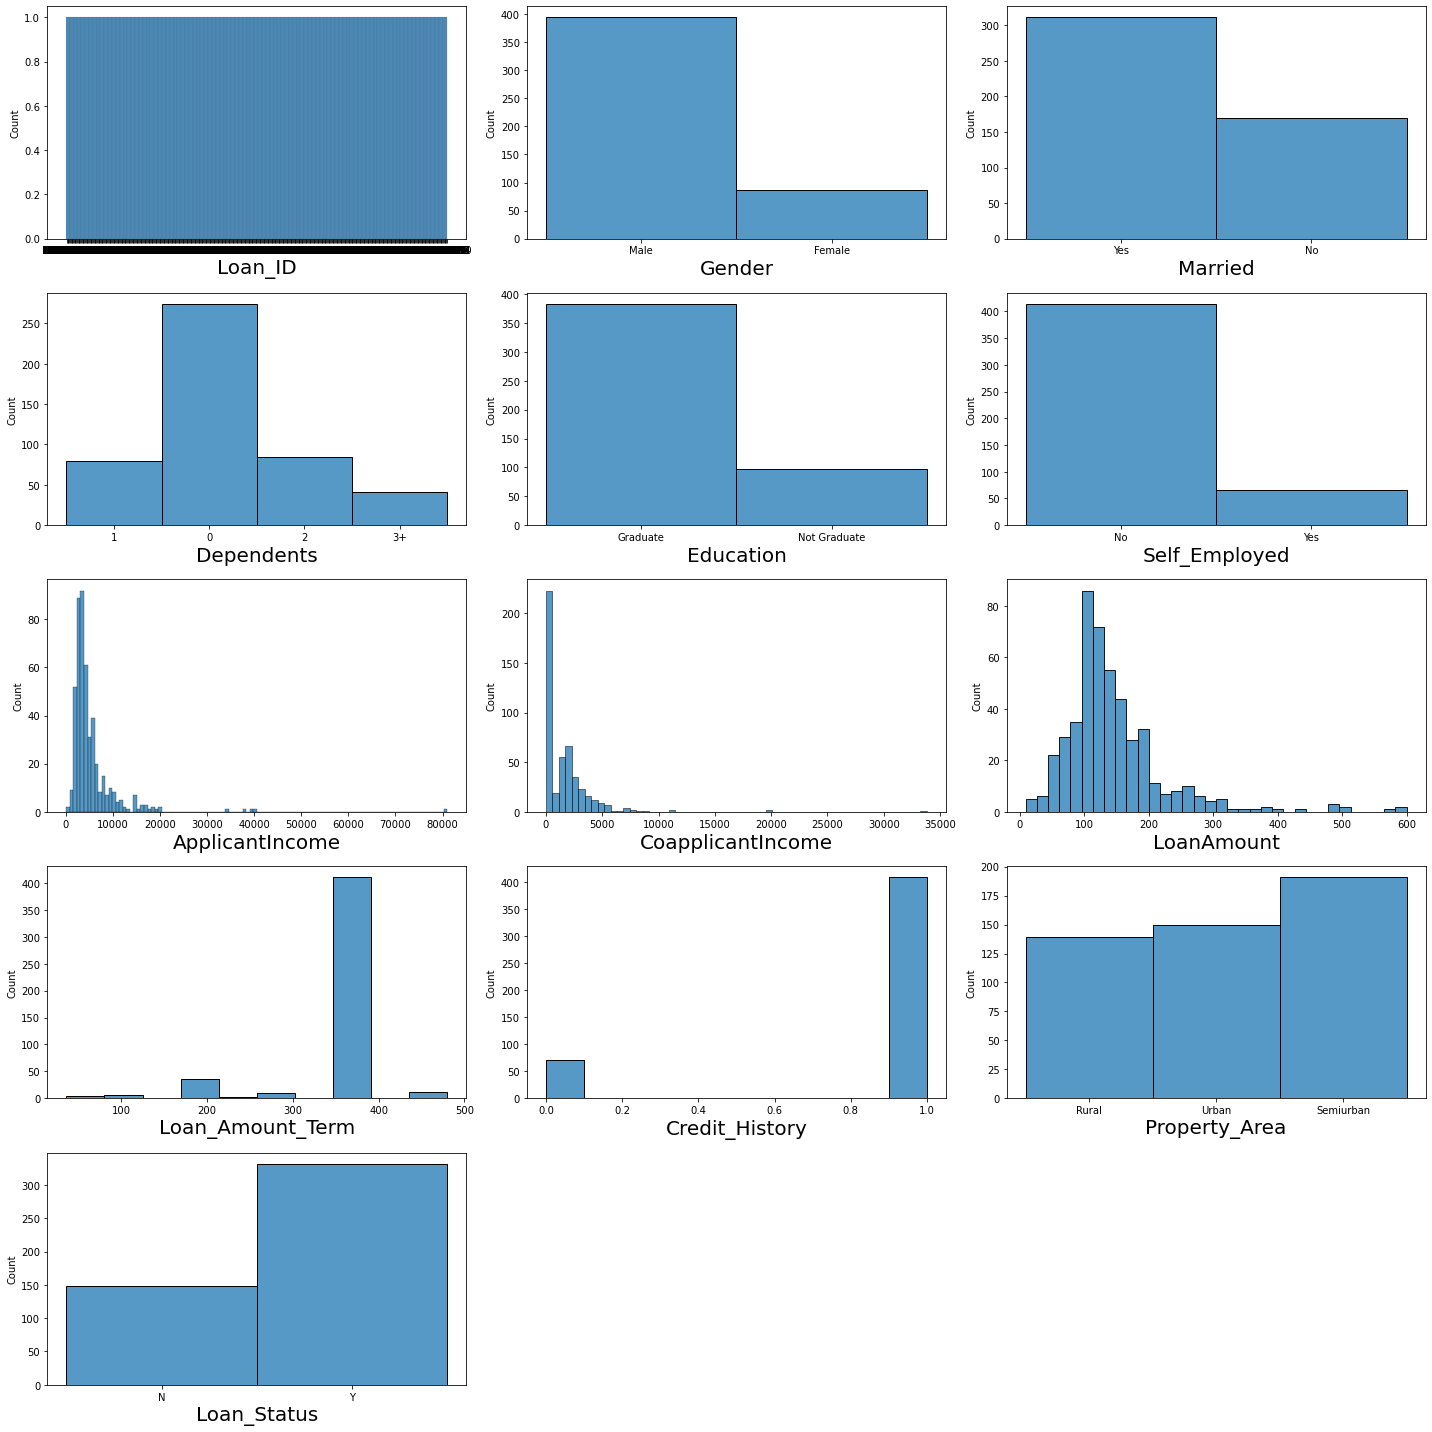

In [41]:
#Lets check data destribution, visualize the dataset

plt.figure(figsize=(20,20))
plotnumber=1

for column in df:
    if plotnumber<=15:
        ax=plt.subplot(5,3, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

<AxesSubplot:xlabel='Gender', ylabel='count'>

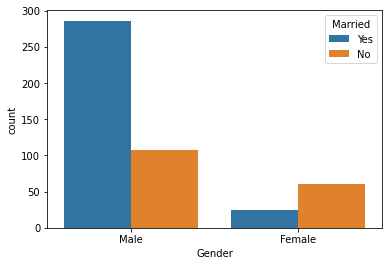

In [42]:
#Plotting genderwise married applcants

sns.countplot(df["Gender"], hue=df["Married"])

<AxesSubplot:xlabel='Married', ylabel='count'>

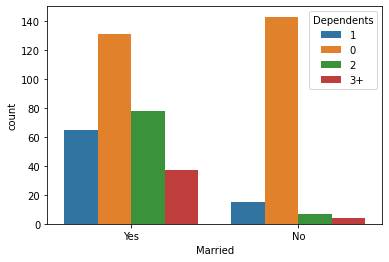

In [43]:
#Plotting Married Vs. Dependents

sns.countplot(df["Married"], hue=df["Dependents"])

<AxesSubplot:xlabel='Education', ylabel='count'>

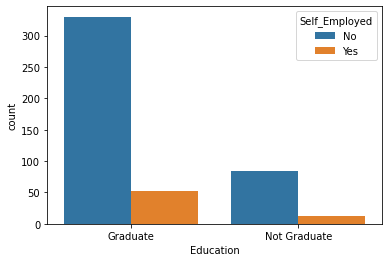

In [45]:
#Plotting Education & Self_Employed
sns.countplot(df["Education"], hue=df["Self_Employed"])

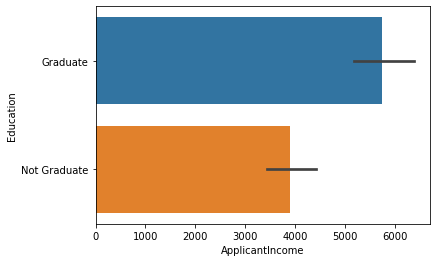

In [57]:
#Finding relationship between ApplicantIncome core & Education

x=df["ApplicantIncome"]
y=df["Education"]

sns.barplot(x,y)
plt.xlabel("ApplicantIncome")
plt.ylabel("Education")
plt.show()

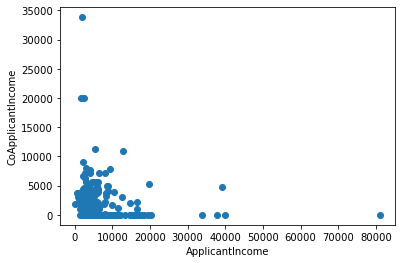

In [65]:
#Finding relationship between ApplicantIncome core & Education

x=df["ApplicantIncome"]
y=df["CoapplicantIncome"]

plt.scatter(x,y)
plt.xlabel("ApplicantIncome")
plt.ylabel("CoApplicantIncome")
plt.show()

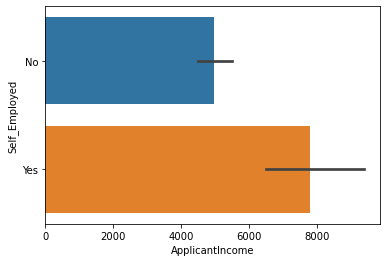

In [75]:
#Finding the income of Self Employed


x=df["ApplicantIncome"]
y=df["Self_Employed"]

sns.barplot(x,y)
plt.xlabel("ApplicantIncome")
plt.ylabel("Self_Employed")
plt.show()


In [ ]:
-From Above it is observed that Self employed peoples income are more than salaried applicants.

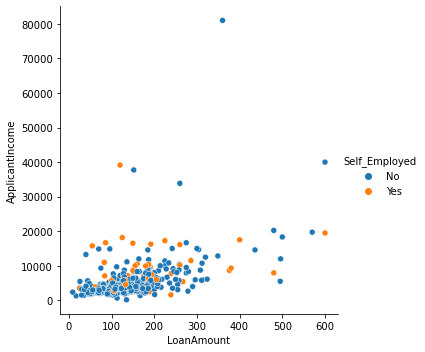

In [74]:
#ApplicantIncome Vs LoanAmount
#Finding relationship between ApplicantIncome core & Education

y=df["ApplicantIncome"]
x=df["LoanAmount"]

sns.relplot(x,y, hue=df["Self_Employed"])
plt.ylabel("ApplicantIncome")
plt.xlabel("LoanAmount")
plt.show()

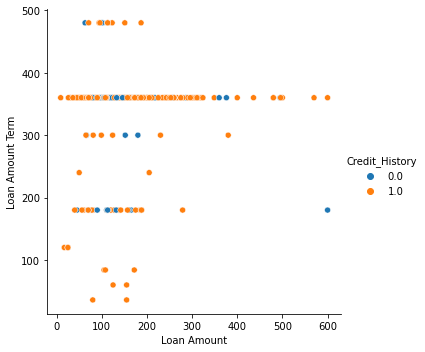

In [87]:
#Loan_Amount_Term Vs LoanAmount

sns.relplot(x=df["LoanAmount"], y=df["Loan_Amount_Term"], hue=df["Credit_History"])
plt.xlabel("Loan Amount")
plt.ylabel("Loan Amount Term")
plt.show()

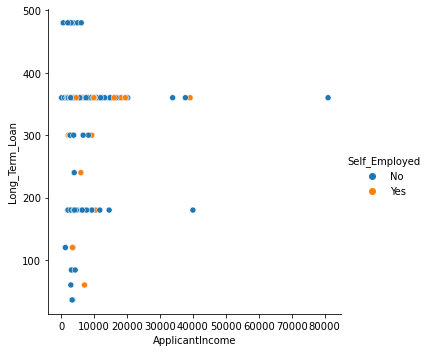

In [92]:
#Applicantincome Vs Long term loan

x=df["ApplicantIncome"]
y=df["Loan_Amount_Term"]

sns.relplot(x,y, hue=df["Self_Employed"])
plt.xlabel("ApplicantIncome")
plt.ylabel("Long_Term_Loan")
plt.show()

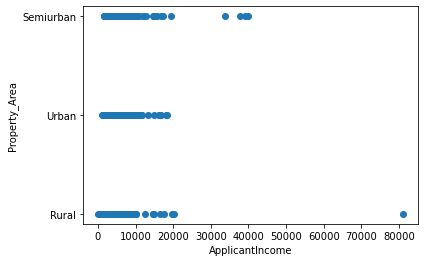

In [95]:
#Applicant Income Vs Propery_Area

x=df["ApplicantIncome"]
y=df["Property_Area"]

plt.scatter(x,y)
plt.xlabel("ApplicantIncome")
plt.ylabel("Property_Area")
plt.show()

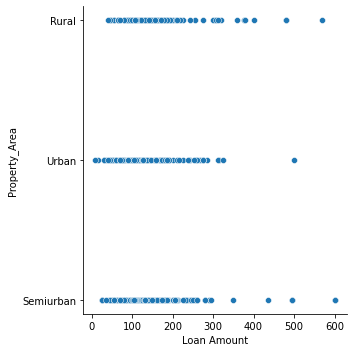

In [99]:
#Loan_Amount Vs Propery_Area

x=df["LoanAmount"]
y=df["Property_Area"]

sns.relplot(x,y)
plt.xlabel("Loan Amount")
plt.ylabel("Property_Area")
plt.show()

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

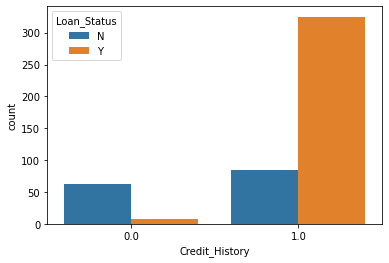

In [100]:
#Credit_History Vs Loan_Status
sns.countplot(df["Credit_History"], hue=df["Loan_Status"])

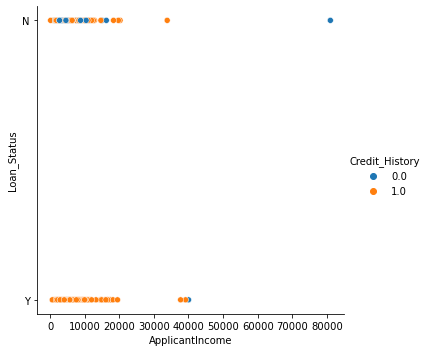

In [108]:
#Finding why some peoples whoes credit history is available but not getting loan 
sns.relplot(x=df["ApplicantIncome"], y=df["Loan_Status"], hue=df["Credit_History"])

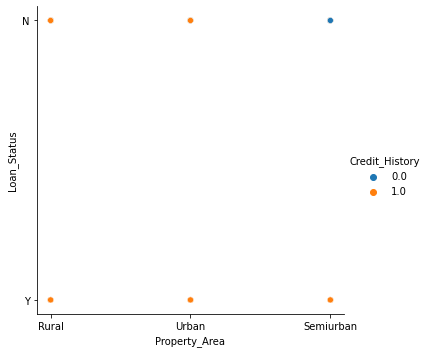

In [109]:
sns.relplot(x=df["Property_Area"], y=df["Loan_Status"], hue=df["Credit_History"])

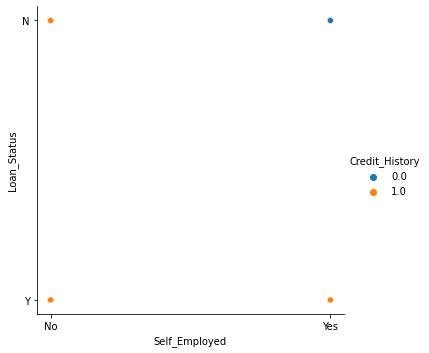

In [110]:
sns.relplot(x=df["Self_Employed"], y=df["Loan_Status"], hue=df["Credit_History"])

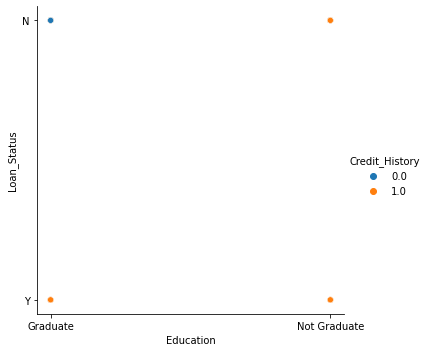

In [111]:
sns.relplot(x=df["Education"], y=df["Loan_Status"], hue=df["Credit_History"])

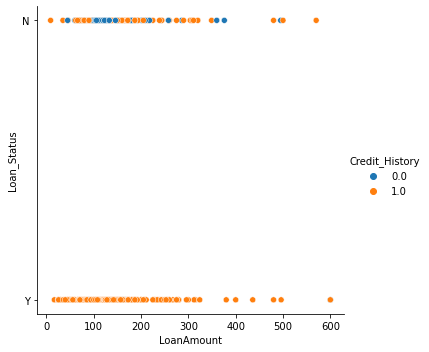

In [112]:
sns.relplot(x=df["LoanAmount"], y=df["Loan_Status"], hue=df["Credit_History"])

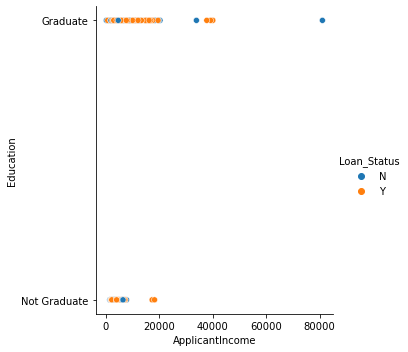

In [113]:
sns.relplot(x=df["ApplicantIncome"], y=df["Education"], hue=df["Loan_Status"])

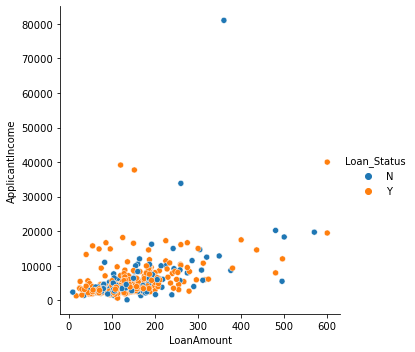

In [117]:
sns.relplot(y=df["ApplicantIncome"], x=df["LoanAmount"], hue=df["Loan_Status"])

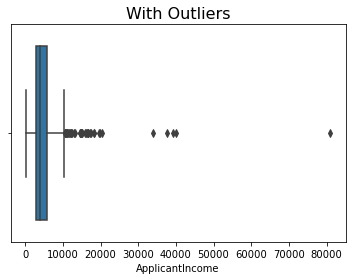

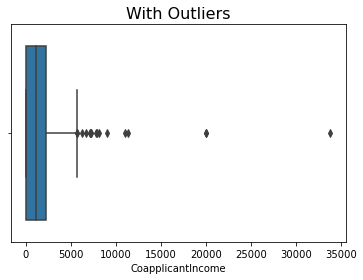

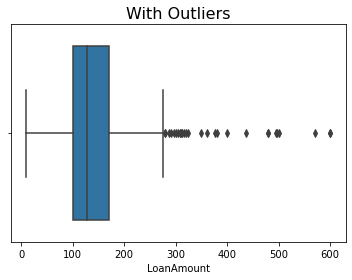

In [118]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount'];

for i in cols:
    sns.boxplot(df[i])
    plt.title('With Outliers',fontsize=16)
    plt.show()

Note:- If we removed the outliers then huge data will lost during outlier removal. Hence i decided to not to remove outlier & go ahead for model training along with outliers.

In [119]:
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()

In [120]:
cols=["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]

df[cols]=df[cols].apply(LabelEncoder().fit_transform)

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [121]:
#We have successfully encoded the data

<AxesSubplot:>

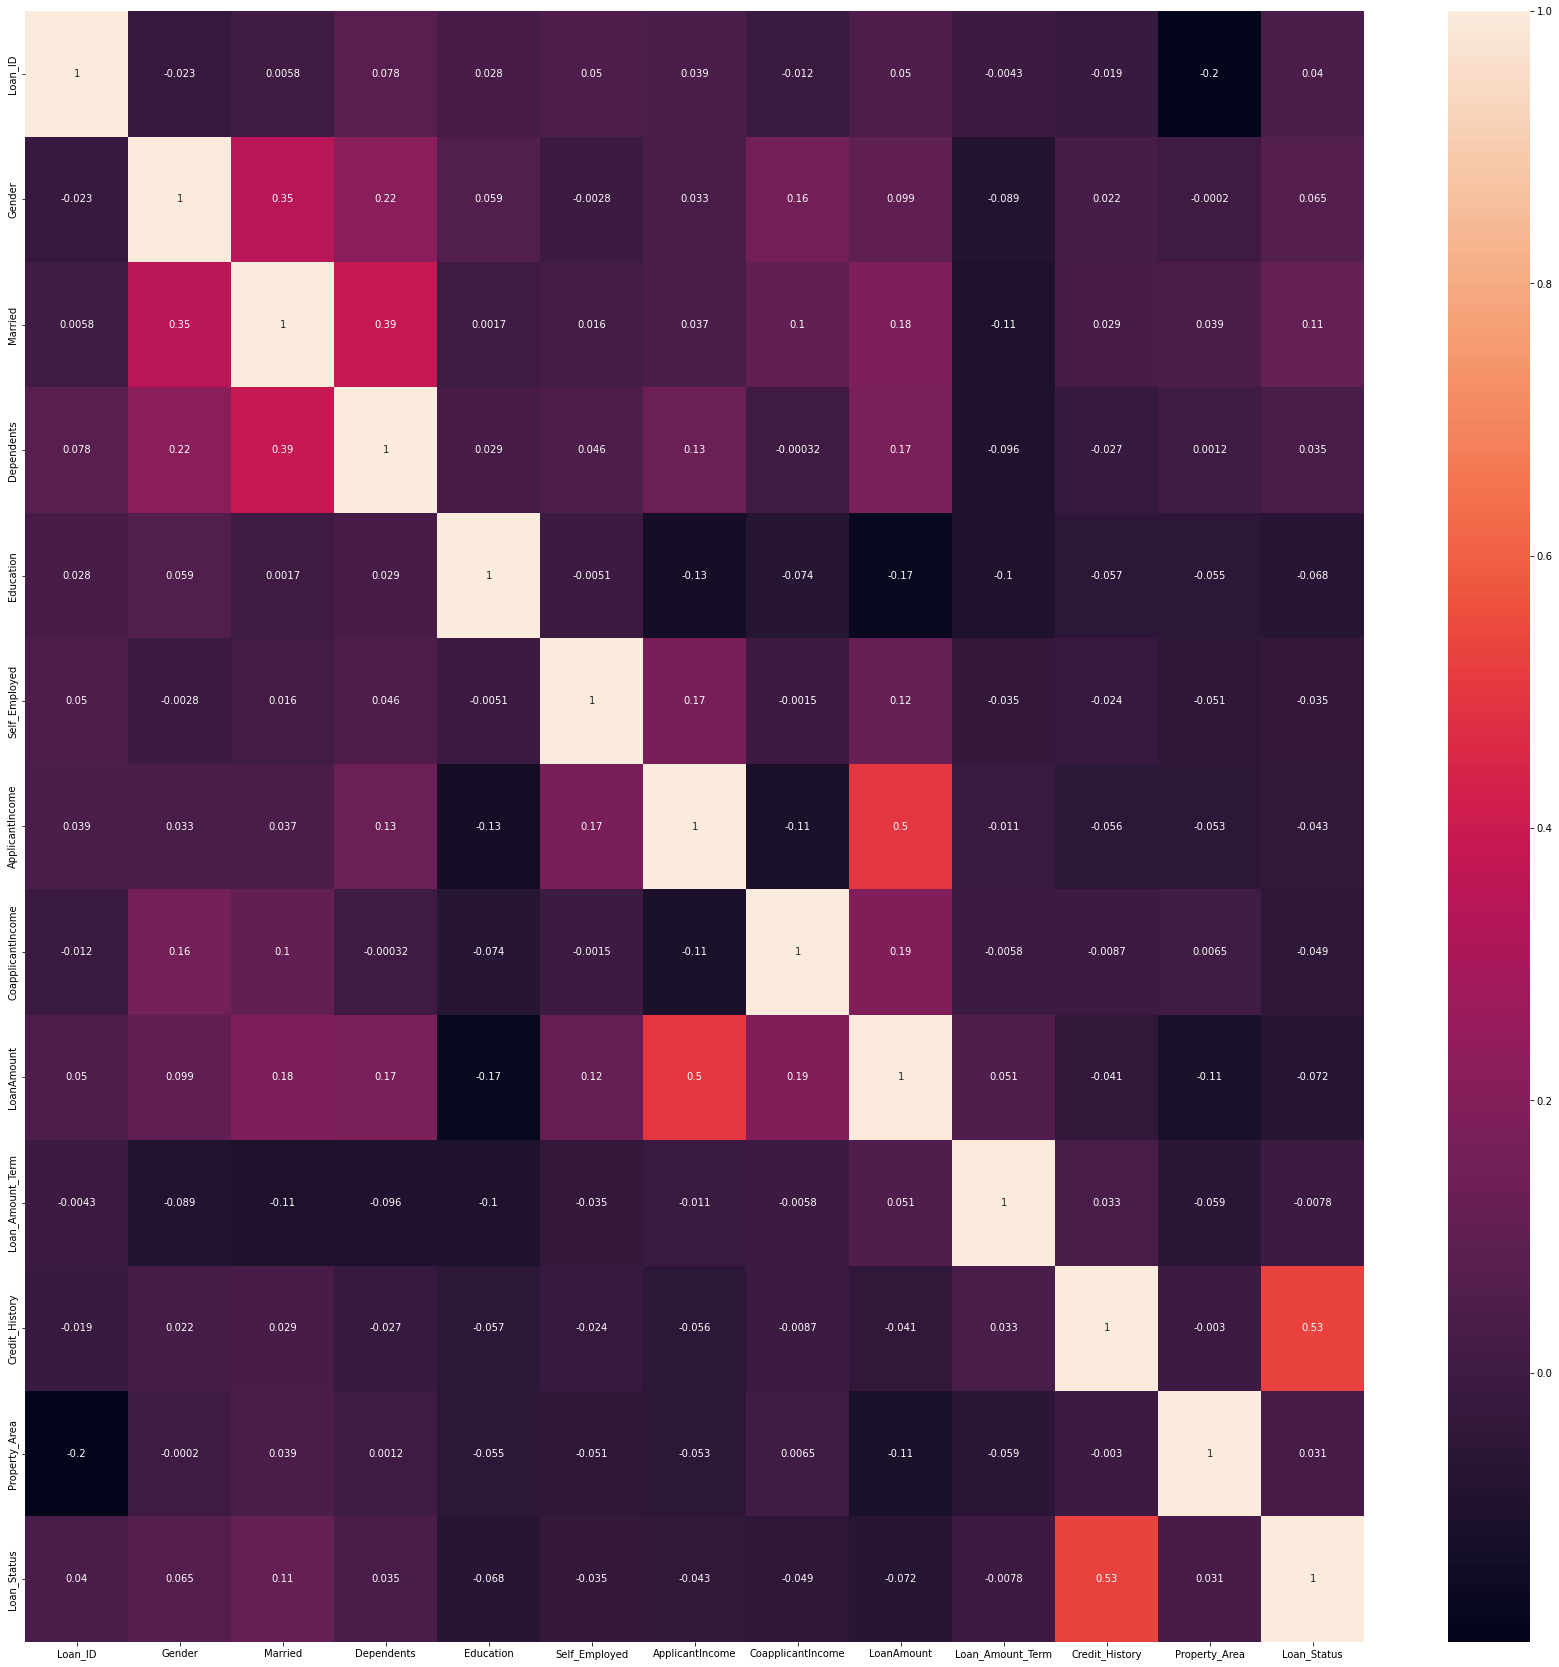

In [122]:

#Finding the correlationship between dataset using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)

# Scaling using Standard scalar

In [123]:
x=df.drop("Loan_Status", axis=1)
y=df["Loan_Status"]

In [124]:
#Scaling of dataset
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [125]:
#Finding Variance inflation factor to check multicolinearity

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns

vif


,vif,features
0,1.051696,Loan_ID
1,1.183324,Gender
2,1.327723,Married
3,1.228452,Dependents
4,1.067856,Education
5,1.037208,Self_Employed
6,1.455341,ApplicantIncome
7,1.135738,CoapplicantIncome
8,1.543303,LoanAmount
9,1.040467,Loan_Amount_Term


In [126]:
#Finding the shape of X
x_scaled.shape

(480, 12)

# Train Test Split

In [127]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.25, random_state=1)

In [128]:
# Write a function & call to check accuracy score of different model

def metric_score (clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n =============Train Result===============")
        print(f"Accuracy score:{accuracy_score(y_train, y_pred)*100:.2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print("\n =============Test Result================")
        print(f"Accuracy score:{accuracy_score(y_test, pred)*100:.2f}%")
        
        print("\n \n classification report \n", classification_report(y_test, pred, digits=2))
        

# Model Initialisatiion using Decision Tree classifier

In [129]:
#Model initialization
# Trying for Decision tree Classifier

clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [130]:
# Call the function & pass the data set into it.

metric_score(clf, x_train, x_test, y_train, y_test, train=True)  # This is for trainig score
metric_score(clf, x_train, x_test, y_train, y_test, train=False)  #This is for testing score


 =============Train Result===============
Accuracy score:100.00%

 =============Test Result================
Accuracy score:63.33%

 
 classification report 
               precision    recall  f1-score   support

           0       0.49      0.44      0.46        43
           1       0.70      0.74      0.72        77

    accuracy                           0.63       120
   macro avg       0.60      0.59      0.59       120
weighted avg       0.63      0.63      0.63       120



In [131]:
#Tunning four important parameters & passing different values for both parameters
grid_param={
    "criterion":["gini","entropy"],
    "max_depth":range(10,15),
    "min_samples_leaf":range(2,6),
    "min_samples_split":range(3,8),
    "max_leaf_nodes":range(5,10)
}

In [132]:
grid_search=GridSearchCV(estimator=clf,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)

In [133]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [134]:
#Finding the best parameters
best_parameters=grid_search.best_params_

print(best_parameters)


{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 7, 'min_samples_leaf': 5, 'min_samples_split': 4}


In [136]:
#Initiating new parameters in decision tree classifier & train

clf=DecisionTreeClassifier(criterion= "gini", max_depth= 10,min_samples_split=4, max_leaf_nodes= 7, min_samples_leaf=5 )

#training of model

clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=7, min_samples_leaf=5,
                       min_samples_split=4)

In [137]:
#Now call the function & pass the data set & train the model

metric_score(clf, x_train, x_test, y_train, y_test, train=True)  # This is for trainig score
metric_score(clf, x_train, x_test, y_train, y_test, train=False)  #This is for testing score



 =============Train Result===============
Accuracy score:86.11%

 =============Test Result================
Accuracy score:69.17%

 
 classification report 
               precision    recall  f1-score   support

           0       0.62      0.37      0.46        43
           1       0.71      0.87      0.78        77

    accuracy                           0.69       120
   macro avg       0.66      0.62      0.62       120
weighted avg       0.68      0.69      0.67       120



In [138]:
#Predicting y_pred

y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1])

In [139]:
#Plotting confusion matrix.

conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[16, 27],
       [10, 67]], dtype=int64)

In [140]:
#Finding  False positive rate, True positive rate, threshold, AUC, ROC curve.

fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [141]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.         0.62790698 1.        ]
True Positive Rate [0.         0.87012987 1.        ]
Threshold [2 1 0]


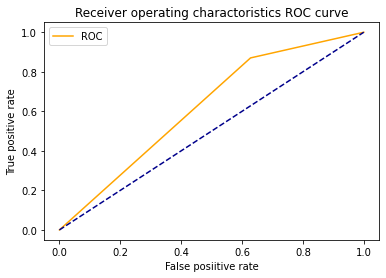

In [142]:
#Plotting ROC curve

plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [143]:
#Finding AUC score
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.621111446692842


# Using Knn Classifier

In [144]:

from sklearn.model_selection import KFold, cross_val_score

In [145]:
#Building model to test unexposed data

x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=1)

In [146]:
knn=KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [147]:
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:86.11%

 =============Test Result================
Accuracy score:75.83%

 
 classification report 
               precision    recall  f1-score   support

           0       0.85      0.40      0.54        43
           1       0.74      0.96      0.84        77

    accuracy                           0.76       120
   macro avg       0.79      0.68      0.69       120
weighted avg       0.78      0.76      0.73       120



In [188]:
#Got accuracy :76%, Precision:79%,recall: 68%, F1 score: 69%

In [189]:
#Cross Validation

cross_val_score(knn, x_scaled, y, cv=5)


array([0.79166667, 0.73958333, 0.77083333, 0.83333333, 0.80208333])

In [190]:
#Finding mean CV score
cross_val_score(KNeighborsClassifier(), x_scaled, y, cv=5).mean()

0.7875000000000001

In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
param_grid={"algorithm":["kd_tree","brute"],
           "leaf_size":[3,5,6,7,8],
           "n_neighbors": [3,5,7,9,11,13]}

In [152]:
gridsearch= GridSearchCV(estimator=knn, param_grid=param_grid)

In [153]:
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [154]:
#Finding the best parameters

gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [161]:
#We will use best parameters in our knn & check accuracy is increasing
knn=KNeighborsClassifier(algorithm="kd_tree",leaf_size=3, n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3)

In [162]:
# Call the function & pass the dataset to check train test score
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:86.11%

 =============Test Result================
Accuracy score:75.83%

 
 classification report 
               precision    recall  f1-score   support

           0       0.85      0.40      0.54        43
           1       0.74      0.96      0.84        77

    accuracy                           0.76       120
   macro avg       0.79      0.68      0.69       120
weighted avg       0.78      0.76      0.73       120



In [163]:
#Lets plot confusion matrix
y_pred=knn.predict(x_test)


In [164]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[17, 26],
       [ 3, 74]], dtype=int64)

In [165]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [166]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.         0.60465116 1.        ]
True Positive Rate [0.         0.96103896 1.        ]
Threshold [2 1 0]


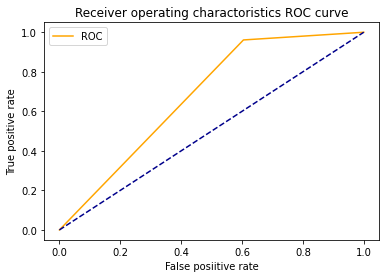

In [167]:
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [168]:
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.6781938991241316


# Random Forest

In [169]:
random_clf= RandomForestClassifier()

random_clf.fit(x_train, y_train)


RandomForestClassifier()

In [170]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)



 =============Train Result===============
Accuracy score:100.00%

 =============Test Result================
Accuracy score:68.33%

 
 classification report 
               precision    recall  f1-score   support

           0       0.60      0.35      0.44        43
           1       0.71      0.87      0.78        77

    accuracy                           0.68       120
   macro avg       0.65      0.61      0.61       120
weighted avg       0.67      0.68      0.66       120



# Parameter Tunning

In [171]:
param={"n_estimators":[13,15],
       "criterion":["entropy","gini"],
       "max_depth":[10,15],
       "min_samples_split":[10,11],
       "min_samples_leaf":[5,6]
       
      }

grd=GridSearchCV(random_clf, param_grid= param)

grd.fit(x_train,y_train)

print("best_params=>", grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 13}


In [172]:
random_clf=RandomForestClassifier(criterion= 'entropy', max_depth=10, min_samples_leaf=6, min_samples_split=11, n_estimators= 13)


random_clf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=11, n_estimators=13)

In [173]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:85.00%

 =============Test Result================
Accuracy score:72.50%

 
 classification report 
               precision    recall  f1-score   support

           0       0.75      0.35      0.48        43
           1       0.72      0.94      0.81        77

    accuracy                           0.73       120
   macro avg       0.73      0.64      0.64       120
weighted avg       0.73      0.72      0.69       120



In [174]:
#Lets plot confusion matrix
y_pred=random_clf.predict(x_test)

In [175]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[15, 28],
       [ 5, 72]], dtype=int64)

In [196]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [197]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.         0.65116279 1.        ]
True Positive Rate [0.         0.96103896 1.        ]
Threshold [2 1 0]


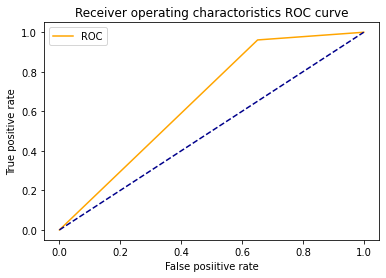

In [198]:
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [199]:
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.6549380851706432


# Logistic Regression

In [176]:
#Model Training

log_reg= LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [177]:
y_pred=log_reg.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1])

In [178]:
#Finding the accuracy score

accuracy=accuracy_score(y_test, y_pred)
accuracy

0.7416666666666667

In [179]:
conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[15, 28],
       [ 3, 74]], dtype=int64)

In [180]:
metric_score(log_reg, x_train, x_test, y_train, y_test, train=True)

metric_score(log_reg, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:82.78%

 =============Test Result================
Accuracy score:74.17%

 
 classification report 
               precision    recall  f1-score   support

           0       0.83      0.35      0.49        43
           1       0.73      0.96      0.83        77

    accuracy                           0.74       120
   macro avg       0.78      0.65      0.66       120
weighted avg       0.76      0.74      0.71       120



In [181]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [182]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.         0.65116279 1.        ]
True Positive Rate [0.         0.96103896 1.        ]
Threshold [2 1 0]


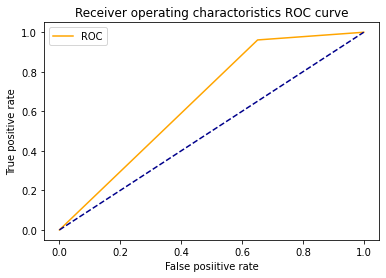

In [183]:
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()


In [184]:
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.6549380851706432


In [185]:
#Saving the model in local file system 
import pickle

pickle.dump(random_clf, open("rn", "wb"))

In [186]:
loaded_model=pickle.load(open("rn", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

72.5


In [187]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
Predicted,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,0,1,1,1,1
Original,0,0,1,0,1,1,1,1,0,1,...,0,0,0,0,1,1,1,1,1,1


# Finalising the model & Prediction

In [192]:
#Saving the model in local file system -Knn
import pickle

pickle.dump(knn, open("kn", "wb"))

In [193]:
loaded_model=pickle.load(open("kn", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

75.83333333333333


In [194]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
Predicted,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,0,1,1,0,1
Original,0,0,1,0,1,1,1,1,0,1,...,0,0,0,0,1,1,1,1,1,1


# Observations